In [ ]:
# Wrangling images
# Find image dimensions, crop or pad an image
# RTS, Feb 2023

import os
# Make the display full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
# Required imports
import cv2
import numpy
import urllib.request
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from google.colab.patches import cv2_imshow

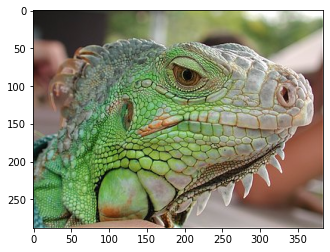

In [2]:
# Read in an image from the internet and display it.
image_source = 'https://raw.githubusercontent.com/realtechsupport/CriticalMachineLearning/main/various_datasets/reptile_color.jpg'
request = urllib.request.urlopen(image_source)
arr = numpy.asarray(bytearray(request.read()), dtype=numpy.uint8)
image_brg = cv2.imdecode(arr, -1)
image = cv2.cvtColor(image_brg, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
#Get the dimensions of an image
size = image.size
dimensions = image.shape
print(dimensions, size)
print('height: ', dimensions[0])
print('width: ', dimensions[1])
print('number of bands: ', dimensions[2])

(288, 384, 3) 331776
height:  288
width:  384
number of bands:  3


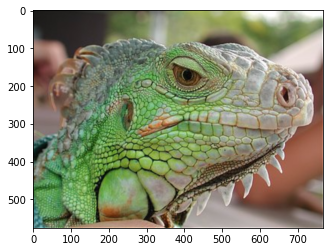

In [5]:
#Resize an image
n = 2
interpolation_method = cv2.INTER_LINEAR
new_height = n*dimensions[0]
new_width = n*dimensions[1]
bigger_image = cv2.resize(image, (new_width, new_height), interpolation_method)
plt.imshow(bigger_image)

In [6]:
#Split color image into bands, and find the dimensions
b,g,r = cv2.split(image) #returns numpy matrix
print (b.shape)

(288, 384)


In [8]:
# The next cells describe the use of padding with numpy.pad
# https://sparrow.dev/numpy-pad/

x = numpy.ones(3)
y = numpy.pad(x, pad_width=1)
print(x)
print(y)

[1. 1. 1.]
[0. 1. 1. 1. 0.]


In [9]:
# Pad a matrix
x = numpy.ones((3, 3))
y = numpy.pad(x, pad_width=1)
print(x)
print(y)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


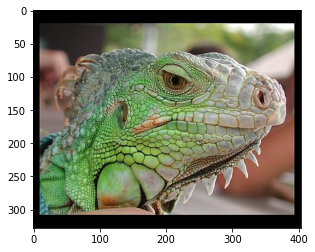

In [10]:
#Pad around a color image (here 10 black pixels on left/right and double that top and bottom)
p = 10
extra_left, extra_right = p,p
extra_top, extra_bottom = 2*p, 2*p 
padded_image = numpy.pad(image, ((extra_top, extra_bottom), (extra_left, extra_right), (0, 0)), mode='constant', constant_values=0) 
plt.imshow(padded_image)

In [11]:
#Compare original and padded image
print(image.shape)
print(padded_image.shape)

(288, 384, 3)
(328, 404, 3)


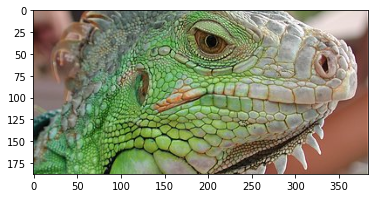

In [ ]:
# The opposite of padding is cropping
# Crop top and bottom

cut = 50
top = cut
bottom = dimensions[0] - cut
cropped_image = image[top:bottom, 0:dimensions[1]]
plt.imshow(cropped_image)

In [ ]:
# YOUR TASK ------------------------------------------------------------------------------
# create a function that takes in two images and adjusts the size of one image to the other
#if the flag = crop, then crop the larger of the two images to the dimensions of the smaller image
#if the flag = pad, then pad the smaller of the two images to the dimensions of the larger image
#to keep things easy, the input images differ in both height and width

# Psydo code for the function
def adjust_image(image1, image2, adjustment):
  #get dimensions of image 1
  #get dimensions of image 2
  #if height of image 1 > height of image 2 and adjustment is crop
  #then perform crop on image 1
  #if height of image 1 > height of image2 and adjustment is pad
  #then perform pad on image 2
  #return the altered image


In [ ]:
#PROCESS
#1) read in image 1
#2) read in image 2
#3) select adjustment (adjustment = crop or adjustment = pad)
#4) call adjust_image
#5) compare dimensions of image 1, image 2, altered image

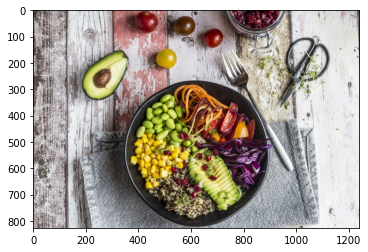

In [ ]:
# Read in image 1
image1_source = 'https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2022-03/plant-based-food-mc-220323-be3500.jpg'
request = urllib.request.urlopen(image1_source)
arr = numpy.asarray(bytearray(request.read()), dtype=numpy.uint8)
image1_brg = cv2.imdecode(arr, -1)
image1 = cv2.cvtColor(image1_brg, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

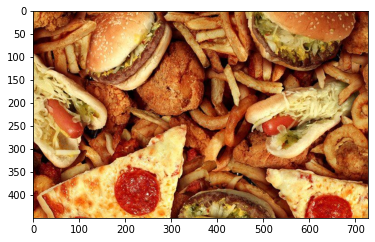

In [ ]:
# Read in image 2
image2_source = 'https://images.everydayhealth.com/images/diet-nutrition/34da4c4e-82c3-47d7-953d-121945eada1e00-giveitup-unhealthyfood.jpg'
request = urllib.request.urlopen(image2_source)
arr = numpy.asarray(bytearray(request.read()), dtype=numpy.uint8)
image2_brg = cv2.imdecode(arr, -1)
image2 = cv2.cvtColor(image2_brg, cv2.COLOR_BGR2RGB)
plt.imshow(image2)